# U.S. Medical Insurance Costs

In [80]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('./insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [82]:
df.sex.unique()

array(['female', 'male'], dtype=object)

The dataset contain information about the medical insurance charge for individuals, and includes the following variables:
- Age : The age of the individual, in years
- Sex : The gender of individual, either female or male

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [84]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


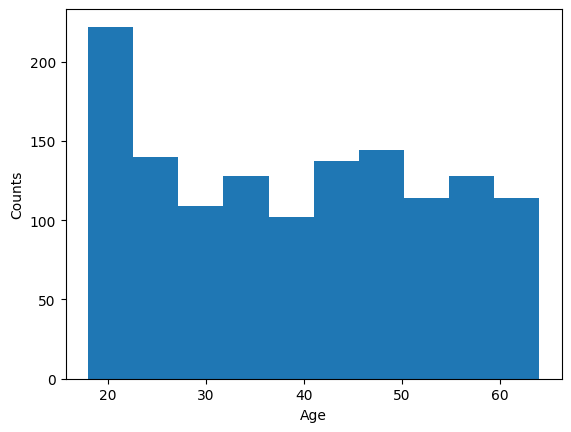

In [85]:
plt.hist(df['age'])
plt.ylabel('Counts')
plt.xlabel('Age')
plt.show()

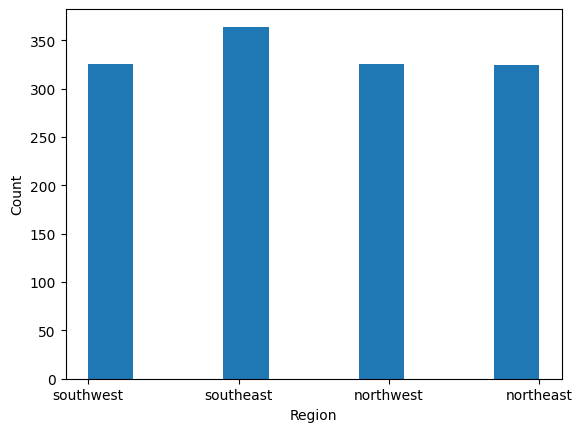

In [86]:
plt.hist(df['region'])
plt.ylabel('Count')
plt.xlabel('Region')
plt.show()

In [87]:
avg_age = df['age'].mean()
print("Mean of age that apply for the insurance " + str(round(avg_age, 2)) + " Years Old")

Mean of age that apply for the insurance 39.21 Years Old


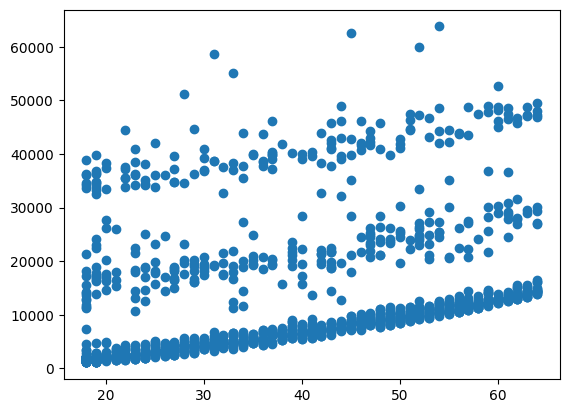

In [88]:
plt.scatter(df['age'], df['charges'])
plt.show()

In [89]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [90]:
# Average cost for smoker / not
smoker_cost = df[df['smoker'] == 'yes'].charges.mean()
non_smoker_cost = df[df['smoker'] == 'no'].charges.mean()

print("Average charges for smoker = $ " + str(smoker_cost))
print("Average charges for not a smoker = $ " + str(non_smoker_cost))
# Much Cheaper

Average charges for smoker = $ 32050.23183153284
Average charges for not a smoker = $ 8434.268297856204


In [91]:
corr_df = df[['smoker', 'age', 'bmi', 'children']]


In [92]:
coor_matrix = corr_df.drop('smoker', axis=1).corr()

<Axes: >

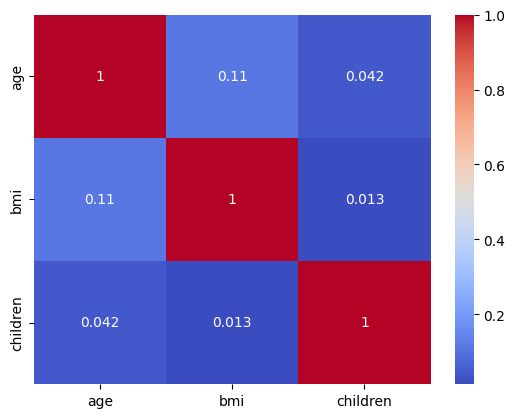

In [93]:
sns.heatmap(coor_matrix, annot=True, cmap='coolwarm')

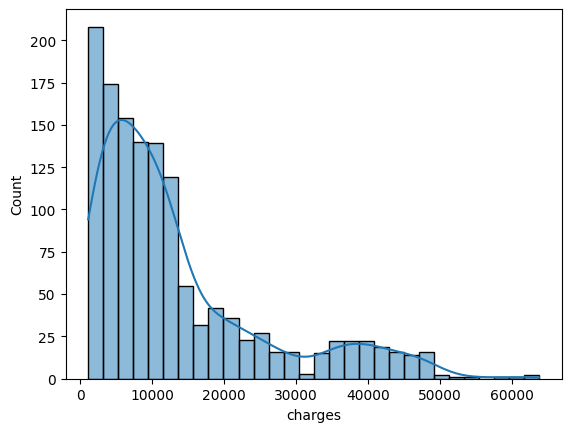

In [94]:
sns.histplot(df['charges'], kde=True)
plt.show()

<Axes: xlabel='smoker', ylabel='charges'>

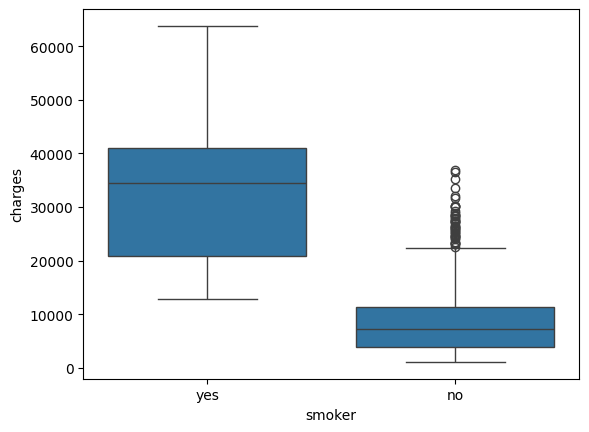

In [95]:
sns.boxplot(x='smoker', y='charges', data=df)

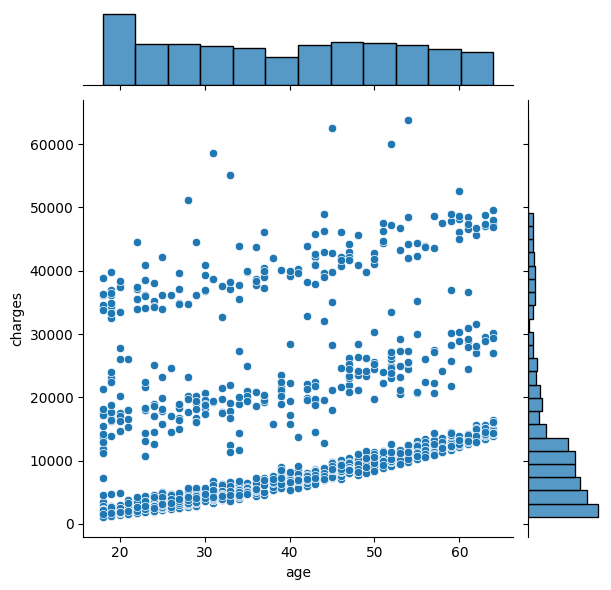

In [96]:
sns.jointplot(x='age', y='charges', data=df)

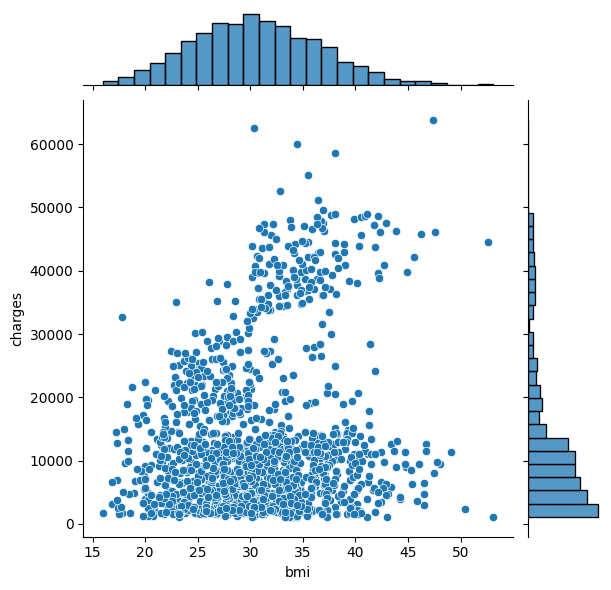

In [97]:
sns.jointplot(x='bmi', y='charges', data=df)

<Axes: xlabel='children', ylabel='charges'>

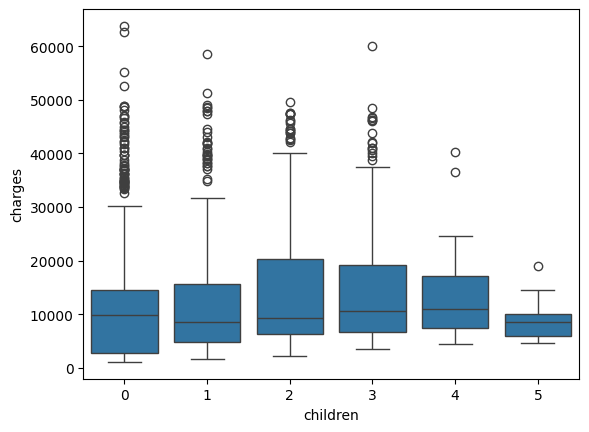

In [98]:
sns.boxplot(x='children', y='charges', data=df)

<Axes: xlabel='region', ylabel='charges'>

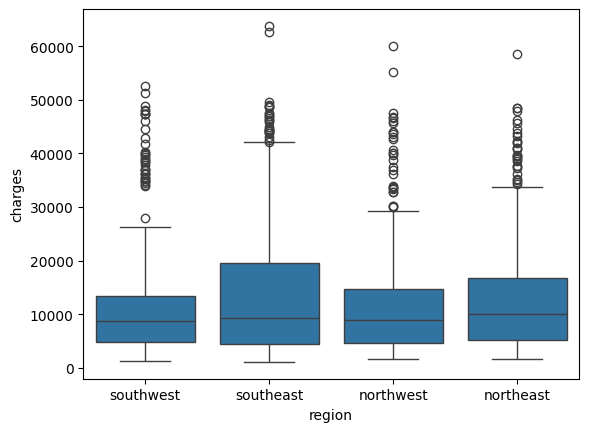

In [99]:
sns.boxplot(x='region', y='charges', data=df)

In [100]:
df = pd.get_dummies(data=df, columns=['smoker', 'sex', 'region'], drop_first=True)

# Normalization
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
df['charges'] = standardScaler.fit_transform(df[['charges']])

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


features = df.drop('charges', axis=1)
target = df['charges']
features.head()

,age,bmi,children,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,False,True
1,18,33.770,1,False,True,False,True,False
2,28,33.000,3,False,True,False,True,False
3,33,22.705,0,False,True,True,False,False
4,32,28.880,0,False,True,True,False,False


In [102]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [103]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [105]:
print("Model Score:", model.score(X_test, y_test))

Model Score: 0.7402515663529091
